## Install dependencies

In [ ]:
!pip install --force-reinstall bioframe==0.7.2 pyarrow fastparquet pyranges==0.1.2 pybedtools==0.10.0 git+https://gitlab.com/gtamazian/pygenomics.git

## Setup the environment


In [9]:
%env BENCH_DATA_ROOT=/Users/mwiewior/research/git/openstack-bdg-runners/ansible/roles/gha_runner/files/databio
%env SEQUILA_CLI=/Users/mwiewior/CLionProjects/sequila-native/target/release/sequila-cli

env: BENCH_DATA_ROOT=/Users/mwiewior/research/git/openstack-bdg-runners/ansible/roles/gha_runner/files/databio
env: SEQUILA_CLI=/Users/mwiewior/CLionProjects/sequila-native/target/release/sequila-cli


In [10]:
import os

BENCH_DATA_ROOT = os.getenv("BENCH_DATA_ROOT", "/data/bench_data/databio/")

In [11]:
import pandas as pd

In [21]:
# 0-
df_path_0 = f"{BENCH_DATA_ROOT}/chainRn4/*.parquet"
df_path_1 = f"{BENCH_DATA_ROOT}/fBrain-DS14718/*.parquet"

In [22]:
# 0-3
df_path_0 = f"{BENCH_DATA_ROOT}/chainRn4/*.parquet"
df_path_3 = f"{BENCH_DATA_ROOT}/chainOrnAna1/*.parquet"

In [23]:
# 0-8
df_path_0 = f"{BENCH_DATA_ROOT}/chainRn4/*.parquet"
df_path_8 = f"{BENCH_DATA_ROOT}/ex-rna/*.parquet"

In [24]:
# 7-8
df_path_7 = f"{BENCH_DATA_ROOT}/ex-anno/*.parquet"
df_path_8 = f"{BENCH_DATA_ROOT}/ex-rna/*.parquet"

In [26]:
df_0 = pd.read_parquet(df_path_0.replace("*.parquet", ""), engine="pyarrow")
df_1 = pd.read_parquet(df_path_1.replace("*.parquet", ""), engine="pyarrow")
df_3 = pd.read_parquet(df_path_3.replace("*.parquet", ""), engine="pyarrow")
df_7 = pd.read_parquet(df_path_7.replace("*.parquet", ""), engine="pyarrow")
df_8 = pd.read_parquet(df_path_8.replace("*.parquet", ""), engine="pyarrow")

In [27]:
import bioframe as bf

bf.overlap(
    df_0,
    df_1,
    cols1=("contig", "pos_start", "pos_end"),
    cols2=("contig", "pos_start", "pos_end"),
    how="inner",
).count()

contig        320955
pos_start     320955
pos_end       320955
contig_       320955
pos_start_    320955
pos_end_      320955
dtype: int64

In [4]:
%%bash
$SEQUILA_CLI --file queries/0-1.sql

0 row(s) fetched. 
Elapsed 0.018 seconds.

0 row(s) fetched. 
Elapsed 0.000 seconds.

0 row(s) fetched. 
Elapsed 0.000 seconds.

0 row(s) fetched. 
Elapsed 0.000 seconds.

0 row(s) fetched. 
Elapsed 0.000 seconds.

0 row(s) fetched. 
Elapsed 0.009 seconds.

0 row(s) fetched. 
Elapsed 0.000 seconds.

+-----------------+
| count(Int64(1)) |
+-----------------+
| 320955          |
+-----------------+
1 row(s) fetched. 
Elapsed 0.138 seconds.



In [ ]:
bf.overlap(
    df_0,
    df_3,
    cols1=("contig", "pos_start", "pos_end"),
    cols2=("contig", "pos_start", "pos_end"),
    how="inner",
).count()

In [ ]:
%%bash
$SEQUILA_CLI --file queries/0-3.sql

In [ ]:
bf.overlap(
    df_0,
    df_8,
    cols1=("contig", "pos_start", "pos_end"),
    cols2=("contig", "pos_start", "pos_end"),
    how="inner",
).count()

In [ ]:
%%bash
$SEQUILA_CLI --file queries/0-8.sql

In [ ]:
bf.overlap(
    df_7,
    df_8,
    cols1=("contig", "pos_start", "pos_end"),
    cols2=("contig", "pos_start", "pos_end"),
    how="inner",
).count()

In [ ]:
%%bash
$SEQUILA_CLI --file queries/7-8.sql

### pyranges

In [13]:
import pyranges as pr


def df2pr(df):
    return pr.PyRanges(
        chromosomes=df.contig,
        starts=df.pos_start,
        ends=df.pos_end,
    )

In [14]:
df_0_pr = df2pr(df_0)
df_1_pr = df2pr(df_1)
df_3_pr = df2pr(df_3)
df_7_pr = df2pr(df_7)
df_8_pr = df2pr(df_8)

In [ ]:
len(df_0_pr.join(df_1_pr))

In [ ]:
len(df_0_pr.join(df_3_pr))

In [ ]:
len(df_0_pr.join(df_8_pr))

In [ ]:
len(df_7_pr.join(df_8_pr))

### pybedtools

In [ ]:
import pybedtools

In [ ]:
df_0_bed = pybedtools.BedTool.from_dataframe(df_0)
df_1_bed = pybedtools.BedTool.from_dataframe(df_1)
df_3_bed = pybedtools.BedTool.from_dataframe(df_3)
df_7_bed = pybedtools.BedTool.from_dataframe(df_7)
df_8_bed = pybedtools.BedTool.from_dataframe(df_8)

In [ ]:
df_0_bed.intersect(df_1_bed).count()

In [ ]:
df_0_bed.intersect(df_3_bed).count()

In [ ]:
df_0_bed.intersect(df_8_bed).count()

In [ ]:
df_7_bed.intersect(df_8_bed).count()

### pygenomics

In [ ]:
from pygenomics.interval import GenomicBase
import itertools

In [ ]:
df_0_pg = GenomicBase([(r.contig, r.pos_start, r.pos_end) for r in df_0.itertuples()])

In [ ]:
df_1_pg = GenomicBase([(r.contig, r.pos_start, r.pos_end) for r in df_1.itertuples()])

In [ ]:
df_7_pg = GenomicBase([(r.contig, r.pos_start, r.pos_end) for r in df_7.itertuples()])

In [ ]:
df_1_a = df_1.values.tolist()
df_3_a = df_3.values.tolist()
df_8_a = df_8.values.tolist()

In [ ]:
df_1_a[1]

In [ ]:
len(
    list(
        itertools.chain.from_iterable(
            [df_0_pg.find_all((r[0], r[1], r[2])) for r in df_1_a]
        )
    )
)

In [ ]:
# slower than array
# len(list(itertools.chain.from_iterable([df_0_pg.find_all((r.contig, r.pos_start, r.pos_end)) for r in df_3.itertuples()])))


In [ ]:
len(
    list(
        itertools.chain.from_iterable(
            [df_0_pg.find_all((r[0], r[1], r[2])) for r in df_3_a]
        )
    )
)

In [ ]:
len(
    list(
        itertools.chain.from_iterable(
            [df_0_pg.find_all((r[0], r[1], r[2])) for r in df_8_a]
        )
    )
)

In [ ]:
len(
    list(
        itertools.chain.from_iterable(
            [
                df_7_pg.find_all((r.contig, r.pos_start, r.pos_end))
                for r in df_8.itertuples()
            ]
        )
    )
)

In [ ]:
len(
    list(
        itertools.chain.from_iterable(
            [df_7_pg.find_all((r[0], r[1], r[2])) for r in df_8_a]
        )
    )
)

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def plot_metrics(metrics, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.10  # the width of the bars
    fig, ax = plt.subplots()
    k = 0
    for m in metrics:
        ax.bar(
            x + width * k,
            [
                metrics[m]["0-1"],
                metrics[m]["0-3"],
                metrics[m]["0-8"],
                metrics[m]["7-8"],
            ],
            width,
            label=m,
        )
        k += 1
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel("Time [s]")
    ax.set_title(title)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
    ax.grid(True)
    fig.set_size_inches(10, 5)
    plt.show()

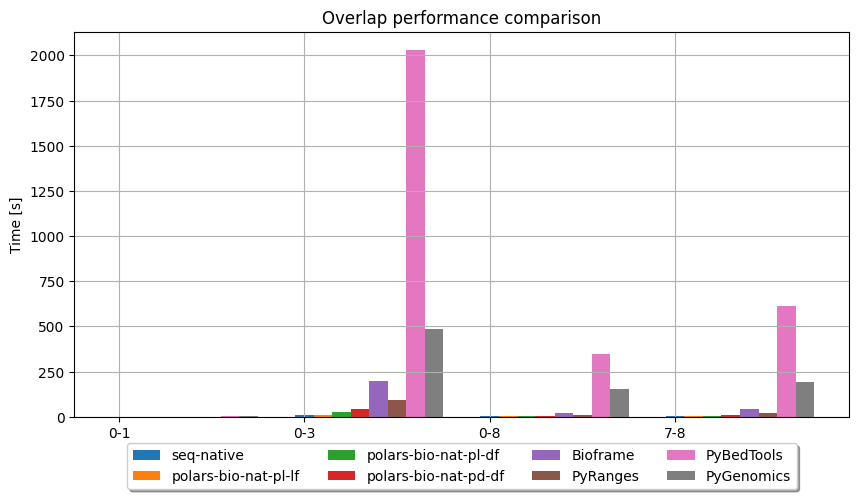

In [6]:
# pygenomic uses ge/lte for comparison - results differ

metrics = {
    "seq-native": {"0-1": 0.144, "0-3": 9.425, "0-8": 3.374, "7-8": 4.756},
    "polars-bio-nat-pl-lf": {"0-1": 0.164, "0-3": 9.248, "0-8": 3.470, "7-8": 5.090},
    "polars-bio-nat-pl-df": {"0-1": 0.145, "0-3": 24.668, "0-8": 4.210, "7-8": 6.698},
    "polars-bio-nat-pd-df": {"0-1": 0.150, "0-3": 41.995, "0-8": 6.392, "7-8": 10.639},
    "Bioframe": {"0-1": 0.559, "0-3": 196.0, "0-8": 21.128, "7-8": 41.103},
    "PyRanges": {"0-1": 0.135, "0-3": 92.0, "0-8": 10.629, "7-8": 19.461},
    "PyBedTools": {"0-1": 1.512, "0-3": 2029.0, "0-8": 350.0, "7-8": 611.0},
    "PyGenomics": {"0-1": 1.579, "0-3": 487.0, "0-8": 153.0, "7-8": 193},
}
plot_metrics(
    metrics, ["0-1", "0-3", "0-8", "7-8"], "Overlap operation performance comparison"
)

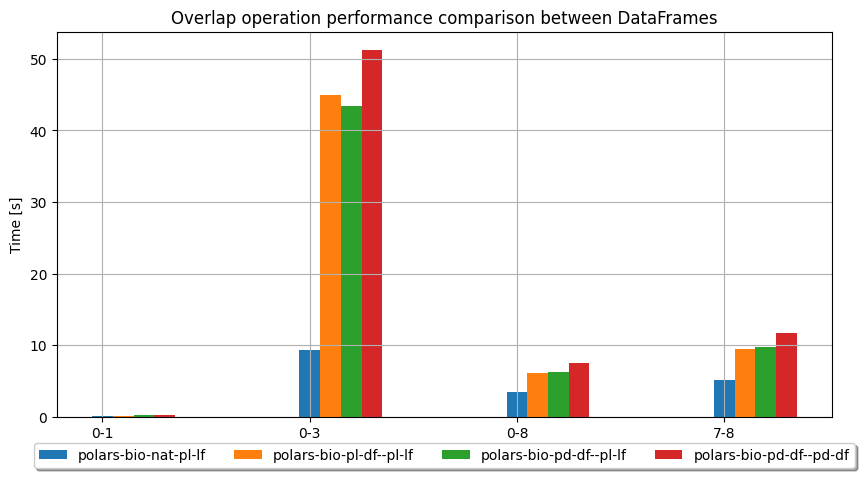

In [7]:
metrics = {
    "polars-bio-nat-pl-lf": {"0-1": 0.164, "0-3": 9.248, "0-8": 3.470, "7-8": 5.090},
    "polars-bio-pl-df--pl-lf": {
        "0-1": 0.147,
        "0-3": 44.942,
        "0-8": 6.096,
        "7-8": 9.522,
    },
    "polars-bio-pd-df--pl-lf": {
        "0-1": 0.177,
        "0-3": 43.369,
        "0-8": 6.241,
        "7-8": 9.688,
    },
    "polars-bio-pd-df--pd-df": {
        "0-1": 0.175,
        "0-3": 51.226,
        "0-8": 7.435,
        "7-8": 11.756,
    },
}
plot_metrics(
    metrics,
    ["0-1", "0-3", "0-8", "7-8"],
    "Overlap operation performance comparison between DataFrames",
)

## Nearest

In [43]:
from polars_bio import FilterOp
import polars_bio as pb

pb.ctx.set_option("datafusion.execution.target_partitions", "1")
pb.ctx.set_option("datafusion.optimizer.repartition_joins", "false")

### 0-1

In [71]:
len(df_0_pr.nearest(df_1_pr))

2350965

In [72]:
pb.nearest(df_path_0, df_path_1, overlap_filter=FilterOp.Strict).collect().count()

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2,distance
u32,u32,u32,u32,u32,u32,u32
2350965,2350965,2350965,2350965,2350965,2350965,2350965


In [83]:
len(
    pb.nearest(
        df_0, df_1, overlap_filter=FilterOp.Strict, output_type="pandas.DataFrame"
    )
)

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


2350965

In [76]:
len(
    bf.closest(
        df_0,
        df_1,
        suffixes=("_1", "_2"),
        cols1=("contig", "pos_start", "pos_end"),
        cols2=("contig", "pos_start", "pos_end"),
    )
)

2350965

In [46]:
### 0-3

In [65]:
len(df_0_pr.nearest(df_3_pr))

2350965

In [77]:
pb.nearest(df_path_0, df_path_3, overlap_filter=FilterOp.Strict).collect().count()

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2,distance
u32,u32,u32,u32,u32,u32,u32
2350965,2350965,2350965,2350965,2350965,2350965,2350965


In [82]:
len(
    pb.nearest(
        df_0, df_3, overlap_filter=FilterOp.Strict, output_type="pandas.DataFrame"
    )
)

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


2350965

In [78]:
len(
    bf.closest(
        df_0,
        df_3,
        suffixes=("_1", "_2"),
        cols1=("contig", "pos_start", "pos_end"),
        cols2=("contig", "pos_start", "pos_end"),
    )
)

2350965

### 0-8

In [67]:
len(df_0_pr.nearest(df_8_pr))

2350965

In [68]:
pb.nearest(df_path_0, df_path_8, overlap_filter=FilterOp.Strict).collect().count()

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2,distance
u32,u32,u32,u32,u32,u32,u32
2350965,2350965,2350965,2350965,2350965,2350965,2350965


In [81]:
len(
    pb.nearest(
        df_0, df_8, overlap_filter=FilterOp.Strict, output_type="pandas.DataFrame"
    )
)

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


2350965

In [75]:
len(
    bf.closest(
        df_0,
        df_8,
        suffixes=("_1", "_2"),
        cols1=("contig", "pos_start", "pos_end"),
        cols2=("contig", "pos_start", "pos_end"),
    )
)

2350965

### 7-8

In [69]:
len(df_7_pr.nearest(df_8_pr))

1194262

In [70]:
pb.nearest(df_path_7, df_path_8, overlap_filter=FilterOp.Strict).collect().count()

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2,distance
u32,u32,u32,u32,u32,u32,u32
1194285,1194285,1194285,1194262,1194262,1194262,1194285


In [80]:
len(
    pb.nearest(
        df_7, df_8, overlap_filter=FilterOp.Strict, output_type="pandas.DataFrame"
    )
)

INFO:polars_bio:Running nearest: algorithm CoitreesNearest with 1 threads


1194285

In [74]:
len(
    bf.closest(
        df_7,
        df_8,
        suffixes=("_1", "_2"),
        cols1=("contig", "pos_start", "pos_end"),
        cols2=("contig", "pos_start", "pos_end"),
    )
)

1194285

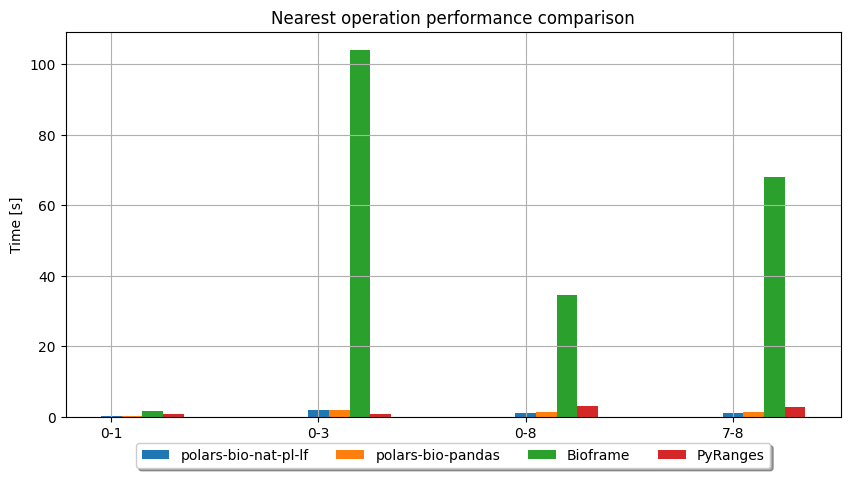

In [84]:
metrics = {
    "polars-bio-nat-pl-lf": {"0-1": 0.233, "0-3": 1.945, "0-8": 1.115, "7-8": 1.025},
    "polars-bio-pandas": {"0-1": 0.327, "0-3": 1.939, "0-8": 1.229, "7-8": 1.192},
    "Bioframe": {"0-1": 1.499, "0-3": 104.0, "0-8": 34.454, "7-8": 68.00},
    "PyRanges": {"0-1": 0.724, "0-3": 0.720, "0-8": 2.966, "7-8": 2.866},
}
plot_metrics(
    metrics, ["0-1", "0-3", "0-8", "7-8"], "Nearest operation performance comparison"
)